#Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#Importing File

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
data=pd.read_csv('/content/Wholesale customers data.csv')

#Details Of Data

In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


*Since all datas are of int,no need of encoding

#Checking For Duplicates

In [8]:
data.duplicated().sum()

0

#Checking Missing Values

In [9]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


# Feature scaling

In [11]:
x = data.iloc[:, [2,3]].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#KMeans Clustering

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)
data['KMeans_Clusters'] = kmeans_labels
silhouette_avg_kmeans = silhouette_score(x_scaled, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans}")


Silhouette Score (KMeans): 0.4547381837507012


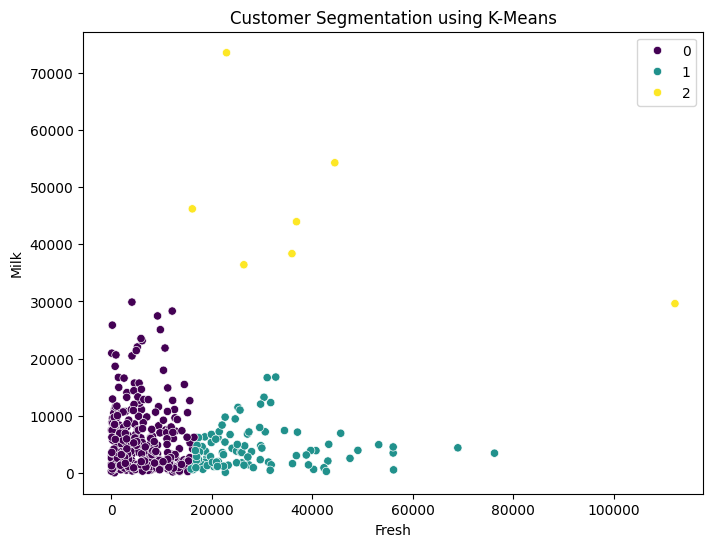

In [13]:
#Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(x=x[:,0], y=x[:,1], hue=kmeans_labels, palette="viridis")
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

#Finding Out Optimal Cluster

In [16]:
def optimal_kmeans(x_scaled):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(x_scaled)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

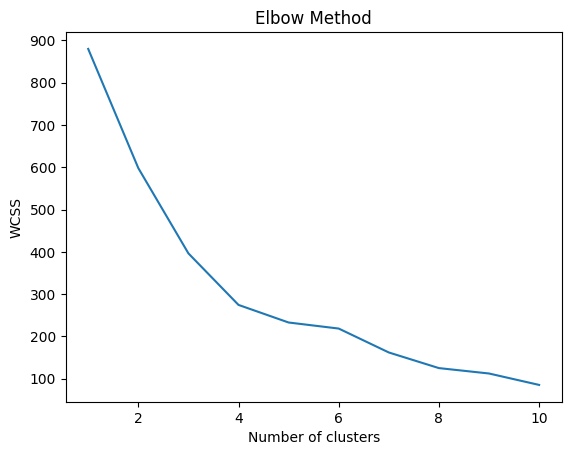

Optimal KMeans clusters: 3


In [20]:
optimal_k = optimal_kmeans(x_scaled)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)
data['KMeans_Clusters'] = kmeans_labels
print(f"Optimal KMeans clusters: {optimal_k}")

#DBSCAN CLUSTERING

In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)
data['DBSCAN_Clusters'] = dbscan_labels

In [23]:
silhouette_avg_dbscan = silhouette_score(x_scaled, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")

Silhouette Score (DBSCAN): 0.7261107159019056


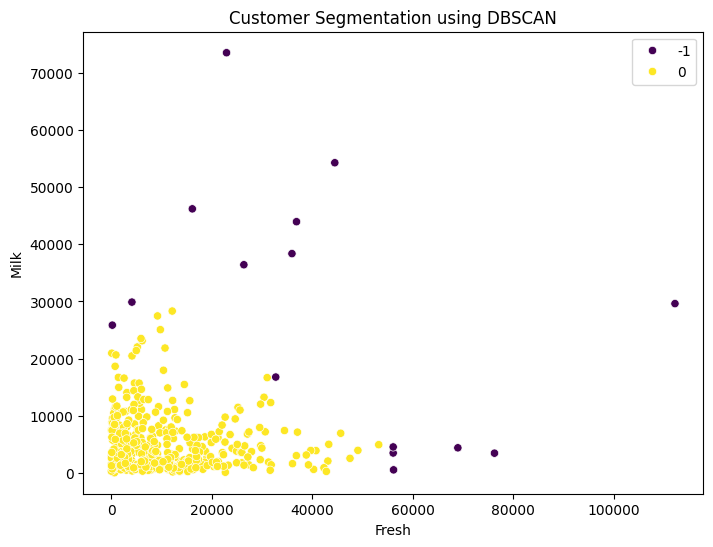

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=dbscan_labels, palette="viridis")
plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

#PCA

In [27]:
#selecting features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
x = data[features].values
#scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
#applying PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
total_variance = explained_variance_ratio.sum()
print(f"Total Explained Variance: {total_variance}")

Explained Variance Ratio: [0.44082893 0.283764  ]
Total Explained Variance: 0.7245929240774496


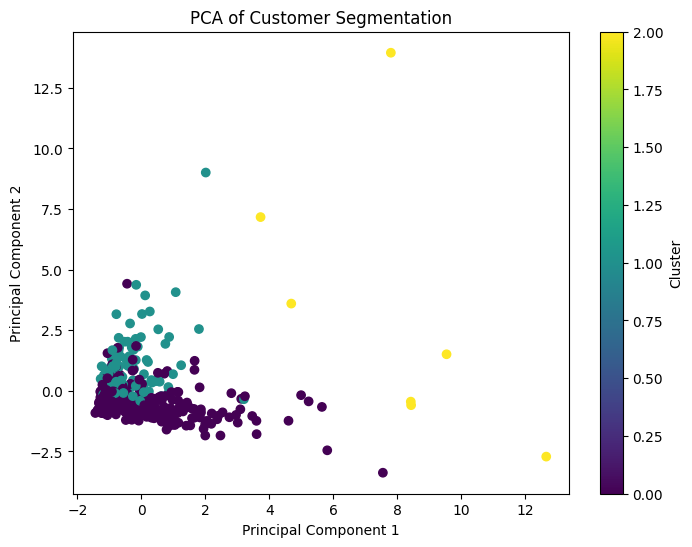

In [31]:
#new dataframe
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['KMeans_Clusters']
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()